# Compute pocket sizes
Plot distributions of pocket sizes for:
1. non-cryptic and cryptic pockets
2. successfully predicted pockets by each tool (p2rank, finetuned model, ...)

In [ ]:
import sys
import numpy as np
sys.path.append('/home/vit/projects/cryptoshow-analysis/src/utils')
import eval_utils
import vis_utils


In [12]:
DATA_PATH = '/home/vit/Projects/cryptoshow-analysis/data/E-regular-binding-site-predictor/ligysis_for_pocket_level_evaluation.csv'
PREDICTIONS_PATH = '/home/vit/Projects/cryptoshow-analysis/data/E-regular-binding-site-predictor/predictions'

# load ground truth binding residues: these have mmcif numbering and need to be mapped to auth labeling
binding_residues_mmcifed, _ = eval_utils.read_test_binding_residues(data_path=DATA_PATH , pocket_types=['NON_CRYPTIC'])
binding_residues_mmcifed = vis_utils.reformat_binding_residues(binding_residues_mmcifed)

# load predictions
model_predictions_mmcifed = vis_utils.read_predictions(data_path=f'{PREDICTIONS_PATH}/finetuning-with-smoothing', protein_ids=binding_residues_mmcifed.keys())
model_predictions_mmcifed = {protein_id: [pocket for (pocket, _) in pockets] for protein_id, pockets in model_predictions_mmcifed.items()}

## Plot dataset sizes
Plot distribution of pocket sizes for pockets.

In [13]:
all_pockets = []
for protein_id in binding_residues_mmcifed.keys():
    all_pockets.extend(binding_residues_mmcifed[protein_id])
    

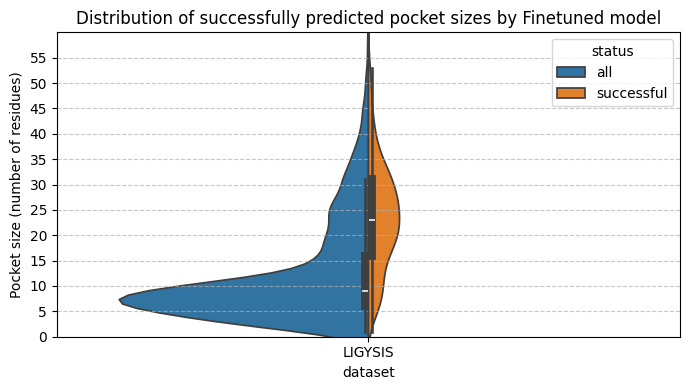

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

pocket_sizes = [len(i) for i in all_pockets]
successful_predictions = vis_utils.compute_avg_successful_pocket_size(binding_residues_mmcifed, model_predictions_mmcifed, coordinates_dir='/home/vit/Projects/cryptoshow-analysis/data/E-regular-binding-site-predictor/ligysis-coordinates')
import pandas as pd

df = pd.DataFrame({
    'size': pocket_sizes + successful_predictions,
    'dataset': (['LIGYSIS'] * len(pocket_sizes) +
                    ['LIGYSIS'] * len(successful_predictions)),
    'status': (['all'] * len(pocket_sizes) +
               ['successful'] * len(successful_predictions))
})
plt.figure(figsize=(7, 4))
ax = sns.violinplot(data=df, x='dataset', y='size', hue='status', split=True, density_norm="count" , common_norm=True)
plt.xticks([0], ['LIGYSIS'])
plt.yticks(np.arange(0, 60, 5.0))
plt.ylim(0, 60)
plt.grid(axis = 'y', linestyle='--', alpha=0.7)
plt.ylabel('Pocket size (number of residues)')
plt.title("Distribution of successfully predicted pocket sizes by Finetuned model")
plt.tight_layout()
plt.show()

In [37]:
medians = {
    'sizes': float(np.median(pocket_sizes)),
    'successful_predictions': float(np.median(successful_predictions)),
}

for name, val in medians.items():
    print(f'{name}: {val}')

sizes: 9.0
successful_predictions: 23.0


# How large are the predictions?
What is the average size of a predicted pocket? 

## Note
THis is for the cryptoshow model predictions

In [2]:
import os
import pickle
import numpy as np
PATH = '/home/skrhakv/cryptoshow-analysis/data/B-evaluate-cryptoshow/predictions/finetuning-with-smoothing'

all_binding_sites = []
for file in os.listdir(PATH):
    with open(os.path.join(PATH, file), 'rb') as f:
        binding_sites = pickle.load(f)
        binding_sites = [site for site in binding_sites]
        all_binding_sites.extend(binding_sites)

all_sizes = [len(site) for site in all_binding_sites]
median_size = float(np.median(all_sizes))
print(f'Median size of all predicted pockets in enhanced scPDB: {median_size}')

Median size of all predicted pockets in enhanced scPDB: 12.0


## How large are the pockets in training data?
Measure the size of cryptic binding sites in the training data.

In [5]:
import csv

pocket_sizes = []
with open('/home/skrhakv/cryptoshow-analysis/data/A-cluster-ligysis-data/clustered-binding-sites.txt', 'r') as f:
    rows = csv.reader(f, delimiter=';')
    for row in rows:
        if row[2] == 'NON_CRYPTIC':
            continue
        pocket_size = len(row[3].split(' '))
        pocket_sizes.append(pocket_size)
median_size = float(np.median(pocket_sizes))
print(f'Median size of all predicted pockets in enhanced scPDB: {median_size}')

Median size of all predicted pockets in enhanced scPDB: 19.0
